# Praktikum IV

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete.  (Ubah data bernilai NaN menjadi 0)
* Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'
* Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?
* Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah
* Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset 1

Dataset yang akan Anda gunakan pada praktikum kali ini adalah dataset komposisi beton (concrete).

In [2]:
# Load data train dan test ke dalam pandas dataframe
# dataset : https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv
concrete = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv")

In [3]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
concrete.shape

(1030, 9)

In [4]:
# menampilkan 10 data teratas
concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,NaN,NaN,192.0,NaN,889.8,945.0,90,21.86
6,166.8,250.2,NaN,203.5,NaN,975.6,692.6,7,15.75
7,251.4,NaN,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,NaN,NaN,192.0,NaN,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#cek nilai yang hilang / missing values di dalam data train
concrete.isnull().sum().sort_values(ascending=False)

ash             566
slag            471
superplastic    379
cement            0
water             0
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

Missing values adalah nilai yang tidak terdefinisi di dataset. Bentuknya beragam, bisa berupa blank cell, ataupun simbol-simbol tertentu seperti NaN (Not a Number), NA (Not Available), ?, -, dan sebagainya. Missing values dapat menjadi masalah dalam analisis data serta tentunya dapat mempengaruhi hasil modelling machine learning.

#### 1. Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete. (Ubah data bernilai NaN menjadi 0)

In [7]:
C = (concrete.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (concrete.dtypes == 'int64') 
Float   = (concrete.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (concrete.isnull().sum()).sum()/np.product(concrete.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 15.27508 %


In [8]:
concrete.shape

(1030, 9)

In [9]:
concrete['cement'] = concrete['cement'].fillna(0)
concrete['slag'] = concrete['slag'].fillna(0)
concrete['ash'] = concrete['ash'].fillna(0)
concrete['water'] = concrete['water'].fillna(0)
concrete['superplastic'] = concrete['superplastic'].fillna(0)
concrete['coarseagg'] = concrete['coarseagg'].fillna(0)
concrete['fineagg'] = concrete['fineagg'].fillna(0)
concrete['age'] = concrete['age'].fillna(0)
concrete['strength'] = concrete['strength'].fillna(0)

In [10]:
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


#### 2. Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'

In [11]:
def get_category(x):
    if x >= 65:
        return 'Hard'
    elif x >= 40:
        return 'Medium'
    return 'Light'

In [12]:
concrete['Category'] = concrete['strength'].apply(get_category)
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Light
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Light
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Light
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Medium
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Light


#### 3. Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?

Text(0.5, 1.0, 'histogram strength')

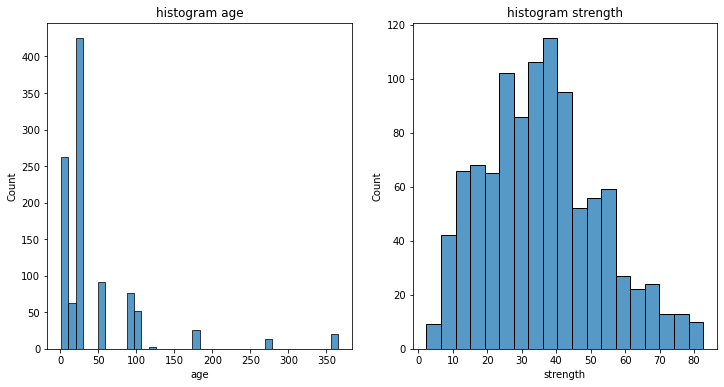

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(concrete['age'], ax=axes[0]).set_title('histogram age')
sns.histplot(concrete['strength'], ax=axes[1]).set_title('histogram strength')

perbandingan umur beton dengan kuat tekan beton adalah berbanding lurus. Dimana semakin panjang umur beton maka kuat tekan beton akan semakin meningkat dan sebaliknya semakin pendek umur beton maka semakin kecil pula kuat tekannya.

#### 4. Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah

In [14]:
print('Kekuatan Concrete Tertinggi')
concrete[concrete['strength']==concrete['strength'].max()]

Kekuatan Concrete Tertinggi


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.6,Hard


In [15]:
print('Kekuatan Concrete Terendah')
concrete[concrete['strength']==concrete['strength'].min()]

Kekuatan Concrete Terendah


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Category
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33,Light


#### 5. Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

##### Kandungan semen

Semakin banyak bahan material semen yang akan Anda gunakan, maka akan dihasilkan konstruksi beton bertulang yang kuat dan baik. Penggunaan semen berbanding lurus dengan kekuatan konstruksi beton.

##### Kandungan Air

Semakin banyak air yang Anda gunakan, maka konstruksi beton yang dihasilkan semakin jelek. Walaupun di dalam pengerjaan konstruksi beton ringan, jika air yang digunakan banyak, konstruksi beton semakin mudah dikerjakan dan pekerjaan menjadi lebih ringan. Kuncinya gunakan air sesedikit mungkin, hanya agar campuran konstruksi beton bisa dikerjakan (bisa diangkut, dicor, dipadatkan dan di-finishing).

##### Campuran Air dan Bahan Material Semen atau Fakor Air Semen (FAS)

Semakin tinggi perbandingan campuran air dan bahan material semen maka konstruksi beton malah semakin jelek. Untuk meningkatkan mutu konstruksi beton rumah harus mengurangi perbandingan air dan bahan material semen.

Faktor air dan bahan material semen adalah perbandingan antara berat air dibandingkan dengan berat bahan material semen. Jika air kita simbolkan dengan W, dan bahan material semen kita simbolkan dengan C maka rumusnya adalah FAS= W / C, dimana berat jenis air adalah 1 kg/liter, dan berat jenis bahan material semen adalah 3150 kg/m3 (disyaratkan American Standard Testing and Material).

##### Agregat (Pasir dan koral)

Campuran yang terlalu banyak pasir walapun akan menjadikan beton halus akan tetapi kekuatannya sedikit berkurang, jika dibandingkan dengan campuran yang normal. Kekuatan beton akan semakin menurun jika ketika pencampuran menggunakan molen terlalu lama. Sebaliknya jika beton terdiri dari koral yang banyak, konstruksi beton akan menjadi kasar akan tetapi kekuatannya mejadi lebih baik jika dibandingkan dengan beton yang menggunakan pasirnya lebih banyak.